This code is for EN5423 class at GIST, Republic of Korea, and created by Dr. Hyunglok Kim.  
**Contact information**: hyunglokkim@gist.ac.kr  
**License**: This work is licensed for non-commercial use only.  
**Restrictions**: Do not use this material without permission for teaching or developing other classes.

In [52]:
import numpy as np
import pandas as pd
from scipy.stats import shapiro
from scipy.stats import ttest_rel
from scipy.stats import wilcoxon

import matplotlib.pyplot as plt

In [49]:
# Example 1
Above = np.array([12, 15, 11, 41, 106, 63, 296, 53, 20, 110, 429, 185])
Below = np.array([9, 8, 38, 24, 48, 17, 11, 41, 14, 60, 53, 124])
D_i = Above - Below
nymph_list = pd.DataFrame({'Above': Above, 'Below': Below, 'D_i': Diff})
nymph_list

,Above,Below,D_i
0,12,9,3
1,15,8,7
2,11,38,-27
3,41,24,17
4,106,48,58
5,63,17,46
6,296,11,285
7,53,41,12
8,20,14,6
9,110,60,50


In [8]:
statistic, p_value = shapiro(D_i)
print("Test statistic:", statistic)
print("P-value:", p_value)

Test statistic: 0.6833876371383667
P-value: 0.0005857152864336967


In [12]:
#the ttest_rel function from the scipy.stats module in Python to perform a paired t-test with specified alternative hypothesis.
# alternative="greater" means we're testing if the mean of Above is greater than the mean of Below
t_statistic, p_value = ttest_rel(Above, Below, alternative="greater")
print("Paired t-test")
print("t =", t_statistic)
print("p-value =", p_value)

Paired t-test
t = 2.0823691158441737
p-value = 0.030723019706026842


(array([5., 3., 2., 0., 0., 0., 0., 1., 0., 1.]),
 array([-27. ,  13.3,  53.6,  93.9, 134.2, 174.5, 214.8, 255.1, 295.4,
        335.7, 376. ]),
 <BarContainer object of 10 artists>)

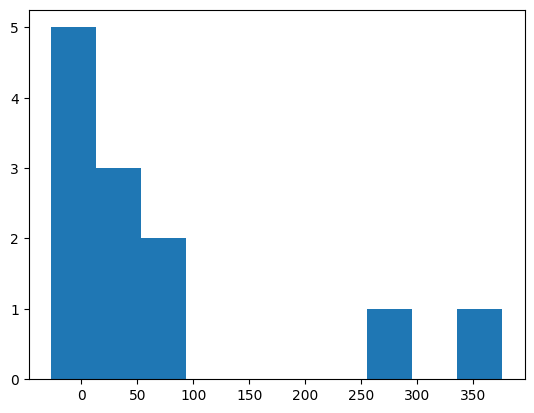

In [15]:
plt.hist(D_i)

In [22]:
Log_D_i = np.log(Above) - np.log(Below)
statistic, p_value = shapiro(Log_D_i)
print("Test statistic:", statistic)
print("P-value:", p_value)

Test statistic: 0.8782374858856201
P-value: 0.08320952206850052


(array([1., 0., 0., 5., 3., 1., 0., 1., 0., 1.]),
 array([-1.23969089, -0.78647538, -0.33325987,  0.11995563,  0.57317114,
         1.02638665,  1.47960215,  1.93281766,  2.38603317,  2.83924867,
         3.29246418]),
 <BarContainer object of 10 artists>)

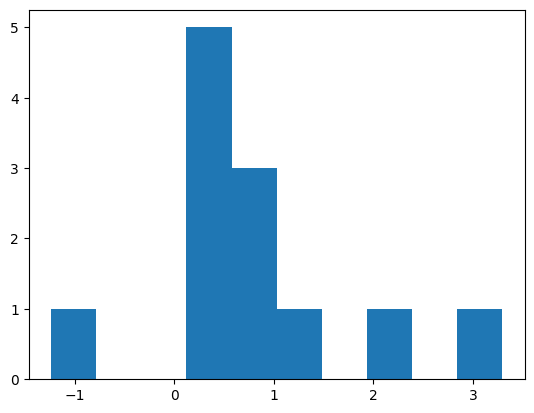

In [23]:
plt.hist(Log_D_i)

In [24]:
t_statistic, p_value = ttest_rel(np.log(Above), np.log(Below), alternative="greater")
print("Paired t-test")
print("t =", t_statistic)
print("p-value =", p_value)

Paired t-test
t = 2.4420714059059323
p-value = 0.016351195560573684


In [40]:
# Example 2. Mayfly nymphs—Permutation test of paired differences.
def permutation_test_mean_difference(observed_diff, n_permutations=10000, alternative='greater'):
    """
    Perform a permutation test of mean differences of matched pairs.

    Parameters:
    observed_diff (array-like): Array of observed differences.
    n_permutations (int): Number of permutations to perform.
    alternative (str): Specifies the alternative hypothesis.
                      - 'two-sided': difference is not equal to 0 (default).
                      - 'greater': difference is greater than 0.
                      - 'less': difference is less than 0.

    Returns:
    p_value (float): Permutation p-value.
    """

    observed_mean_diff = np.mean(observed_diff)

    # Initialize array to store test statistics from permutations
    permuted_diffs = np.zeros(n_permutations)

    # Perform permutations
    for i in range(n_permutations):
        # Randomly permute signs of differences
        permuted_signs = np.random.choice([-1, 1], size=len(observed_diff))
        permuted_diff = observed_diff * permuted_signs
        permuted_diffs[i] = np.mean(permuted_diff)

    # Calculate p-value based on the alternative hypothesis
    if alternative == 'two-sided':
        extreme_count = np.sum(np.abs(permuted_diffs) >= np.abs(observed_mean_diff))
    elif alternative == 'greater':
        extreme_count = np.sum(permuted_diffs >= observed_mean_diff)
    elif alternative == 'less':
        extreme_count = np.sum(permuted_diffs <= observed_mean_diff)
    else:
        raise ValueError("Invalid alternative hypothesis")

    p_value = extreme_count / n_permutations

    return p_value, observed_mean_diff, permuted_diffs

# Example usage:
p_value, observed_mean_diff, permuted_diffs  = permutation_test_mean_difference(Log_D_i)
print("Permutation p-value:", p_value)
print("Mean Difference p-value:", observed_mean_diff)

Permutation p-value: 0.0114
Mean Difference p-value: 0.7764592989644773


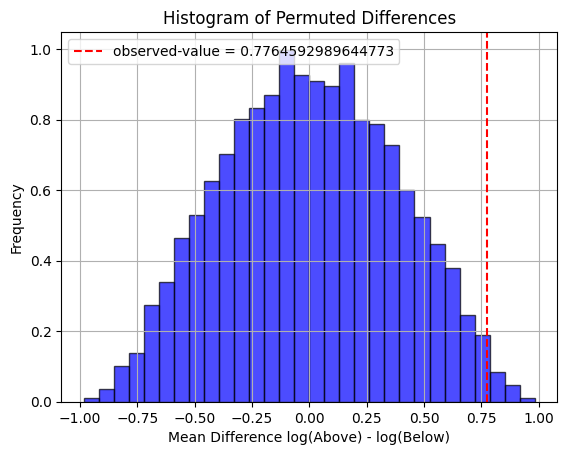

In [38]:
plt.hist(permuted_diffs, bins=30, density=True, alpha=0.7, color='blue', edgecolor='black')
plt.xlabel('Mean Difference log(Above) - log(Below)')
plt.ylabel('Frequency')
plt.title('Histogram of Permuted Differences')
plt.grid(True)

plt.axvline(x=observed_mean_diff, color='red', linestyle='--', label=f'observed-value = {observed_mean_diff}')
plt.legend()

plt.show()

In [47]:
def permutation_test_mean_difference_ind(group1, group2, n_permutations=10000, alternative='greater'):
    """
    Perform a permutation test for the mean difference between two independent groups.

    Parameters:
    group1 (array-like): Array of observations from the first group.
    group2 (array-like): Array of observations from the second group.
    n_permutations (int): Number of permutations to perform.
    alternative (str): Specifies the alternative hypothesis.
                      - 'two-sided': difference is not equal to 0 (default).
                      - 'greater': difference is greater than 0.
                      - 'less': difference is less than 0.

    Returns:
    p_value (float): Permutation p-value.
    observed_mean_diff (float): The observed difference in means between the two groups.
    permuted_diffs (array): Array of mean differences from permutations.
    """
    observed_mean_diff = np.mean(group1) - np.mean(group2)
    combined_groups = np.concatenate([group1, group2])
    permuted_diffs = np.zeros(n_permutations)

    for i in range(n_permutations):
        np.random.shuffle(combined_groups)
        new_group1 = combined_groups[:len(group1)]
        new_group2 = combined_groups[len(group1):]
        permuted_diff = np.mean(new_group1) - np.mean(new_group2)
        permuted_diffs[i] = permuted_diff

    if alternative == 'two-sided':
        extreme_count = np.sum(np.abs(permuted_diffs) >= np.abs(observed_mean_diff))
    elif alternative == 'greater':
        extreme_count = np.sum(permuted_diffs >= observed_mean_diff)
    elif alternative == 'less':
        extreme_count = np.sum(permuted_diffs <= observed_mean_diff)
    else:
        raise ValueError("Invalid alternative hypothesis")

    p_value = extreme_count / n_permutations
    return p_value, observed_mean_diff, permuted_diffs

p_value, observed_mean_diff, permuted_diffs = permutation_test_mean_difference_ind(np.log(Above), np.log(Below))
print("Permutation p-value:", p_value)
print("Observed Mean Difference:", observed_mean_diff)

Permutation p-value: 0.0466
Observed Mean Difference: 0.7764592989644772


In [51]:
# Compute the logarithms of the 'Above' and 'Below' data
log_Above = np.log(Above)
log_Below = np.log(Below)

# Performing the Wilcoxon signed-rank test
result = wilcoxon(log_Above, log_Below, alternative='greater')

# Output the test results
print("Wilcoxon signed rank test")
print(f"V statistic: {result.statistic}, p-value: {result.pvalue}")

# Computing the confidence interval
n = len(log_Above)
differences = log_Above - log_Below
sorted_diff = np.sort(differences)

# Median estimate (pseudo median)
pseudo_median = np.median(differences)

# Output confidence interval and pseudo median
print("Sample estimates:")
print(f"(pseudo)median: {pseudo_median}")

# Computing exp(-pseudo_median)
exp_neg_median = np.exp(-pseudo_median)
print(f"exp(-pseudo_median): {exp_neg_median}")


Wilcoxon signed rank test
V statistic: 69.0, p-value: 0.008056640625
Sample estimates:
(pseudo)median: 0.5708270199633392
exp(-pseudo_median): 0.5650579312176132


In [53]:
import numpy as np
from scipy.stats import ttest_rel

# Performing the paired t-test
t_stat, p_value = ttest_rel(log_Above, log_Below)

# Calculating the mean of the differences
mean_diff = np.mean(log_Above - log_Below)

# Calculating the standard deviation of the differences
std_diff = np.std(log_Above - log_Below, ddof=1)

# Sample size
n = len(log_Above)

# Degrees of freedom
df = n - 1

# Calculating the standard error of the mean difference
sem = std_diff / np.sqrt(n)

# Confidence interval
confidence_level = 0.95
t_critical = np.abs(np.percentile(t_stat, [(1 - confidence_level) / 2, 1 - (1 - confidence_level) / 2]))
ci_lower = mean_diff - t_critical * sem
ci_upper = mean_diff + t_critical * sem

# Output the results
print("Paired t-test")
print(f"t = {t_stat:.4f}, df = {df}, p-value = {p_value:.4f}")
print("alternative hypothesis: true difference in means is not equal to 0")
print("95 percent confidence interval:")
print(f"{ci_lower:.8f} {ci_upper:.8f}")
print("sample estimates:")
print(f"mean of the differences: {mean_diff:.7f}")


Paired t-test
t = 2.4421, df = 11, p-value = 0.0327
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:


TypeError: unsupported format string passed to numpy.ndarray.__format__